# <font style="color:rgb(50,120,229)"> EE5/7382 – Fundamentals of Computer Vision - Midterm
</font>

##### **<font color="red">Faking Miniatures  (35 points)</font>**
Please read the instructions supplied with the midterm for guidance, and deliverables.  

##### <font color="yellow">Preamble</font>

In [1]:
# Preamble
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output    # Need this to display Scale Space
from scipy import ndimage                   # Need this for implementing LoG filtering   

#### <font color="yellow">Helper functions</font>

In [2]:
# Helper functions
def im2double(im):
    info = np.iinfo(im.dtype) # Get the data type of the input image
    return im.astype(float) / info.max # Divide all values by the largest possible value in the datatype

#### <font color="yellow">Step1-: Read the images using `imread()`</font>

In [3]:
fileName = ('Dalmatian.jpg')
dirPath = '.\\Data_Midterm\\'

# Read in Grayscale mode
imRGB = cv.imread( dirPath + fileName )
im = cv.imread( dirPath + fileName , cv.IMREAD_GRAYSCALE )

# Convert to double using im2double()
im = im2double(im)

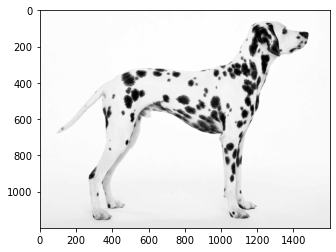

In [4]:
plt.imshow(im,'gray')

#### <font color="yellow">Step-2: Define Parameters for Scale Space</font>

In [5]:
[nR,nC] = im.shape

sigma_init =2      # initial value of sigma (starts with unity)  
k  = 2**(1/4)          # similar to SIFT
num_levels = 10                 # 15 levels in pyramid
sigma_n = sigma_init * np.power(k,np.arange(num_levels))
#threshold =           # eg: 35% of peak value in scale space


#### <font color="yellow">Step-3: Assemble scale-space using scale-normalized LoG filter</font>
Use `scipy` function `gaussian_laplace` to implement LoG filtering.<br>
Remember to rescale the output as we wish to implement scale normalized LoG filtering.<br>
Please read the instructions supplied with the midterm for additional hints.  

In [6]:
from scipy import ndimage

scaleSpace = np.zeros([nR, nC, num_levels])
for n, sigma_nn in enumerate(sigma_n):
    
# compute output of LoG filter using scipy
    result=  ndimage.gaussian_laplace(im, sigma_nn)

#     # compute output of scale-normalized LoG filter
    result *= np.power(sigma_nn,2)
    scaleSpace[:,:,n]=result

#### <font color="yellow">Step-5: Non-maximum suppression within each scale</font>
* The code should return the `[x,y,r]` values associated with each blob
* The matrix `[x,y,r]` should have size $\mathtt{numBlobs}\times 3$ 
* The `(x,y)` coordinates represent the center of the blob
* The term `r` represents the radius of a blob, and is $\sqrt{2}\times \mathtt{characteristic scale}$ at which we detected a scale-space maximum  

In [7]:
szNbrHood=26
NMS_THRESH=0.35 * np.max(scaleSpace)
LCLMX_scaleSpace = np.zeros([nR, nC, num_levels])
for n in range(num_levels):
    strElm = cv.getStructuringElement(cv.MORPH_RECT, (2 * int(szNbrHood) + 1, 2 * int(szNbrHood) + 1))
    LCLMX_scaleSpace[:,:,n] = cv.dilate(scaleSpace[:,:,n], strElm)
    #non_maximum_suppressed = np.where(result[:,:,n] == LCLMX_scaleSpace[:,:,n], 0)
    # Replace each pixel with maximum over neighboring scales
    prev_scale = np.maximum(n-1,0)
    next_scale = np.minimum(n+1,num_levels-1)
    LCLMX_scaleSpace[:,:,n] = np.amax(LCLMX_scaleSpace[:,:,prev_scale:next_scale],axis=2)
    mask = ((scaleSpace >= LCLMX_scaleSpace) & (scaleSpace >= NMS_THRESH))
    NMS_scaleSpace = np.zeros(scaleSpace.shape) 
    NMS_scaleSpace[mask] = scaleSpace[mask]

[y,x,d] = np.nonzero(NMS_scaleSpace)
r = np.power(2,0.5) * sigma_n[d]   

#### <font color="yellow">Step-6: Display the Blobs</font>

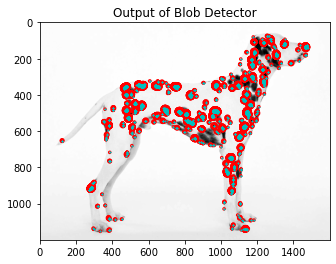

In [8]:
from matplotlib.patches import Circle

fig, ax = plt.subplots(1)
ax.imshow(im,cmap='gray')
plt.title('Output of Blob Detector')
#
# Look at the top <numCircles> entries in vals
for n in np.arange(x.size):
    ax.plot( x[n],y[n], color='c', marker='+', markersize=2 )
    hnd = Circle([x[n],y[n]],r[n],fill=False,color='r',linewidth=2.5)
    ax.add_patch(hnd)
plt.savefig(r'C:\Users\Hedieh\Documents\SMU\computer vision\Midterm\Blobdetection_sigma2_10levels_threshold0.35.png')
plt.show()


In [9]:
[nR,nC] = im.shape

sigma_init =2      # initial value of sigma (starts with unity)  
k  = 2**(1/4)          # similar to SIFT
num_levels = 15                 # 15 levels in pyramid
sigma_n = sigma_init * np.power(k,np.arange(num_levels))
#threshold =           # eg: 35% of peak value in scale space


In [10]:
from scipy import ndimage

scaleSpace = np.zeros([nR, nC, num_levels])
for n, sigma_nn in enumerate(sigma_n):
    
# compute output of LoG filter using scipy
    result=  ndimage.gaussian_laplace(im, sigma_nn)

#     # compute output of scale-normalized LoG filter
    result *= np.power(sigma_nn,2)
    scaleSpace[:,:,n]=result

In [11]:
szNbrHood=26
NMS_THRESH=0.35 * np.max(scaleSpace)
LCLMX_scaleSpace = np.zeros([nR, nC, num_levels])
for n in range(num_levels):
    strElm = cv.getStructuringElement(cv.MORPH_RECT, (2 * int(szNbrHood) + 1, 2 * int(szNbrHood) + 1))
    LCLMX_scaleSpace[:,:,n] = cv.dilate(scaleSpace[:,:,n], strElm)
    #non_maximum_suppressed = np.where(result[:,:,n] == LCLMX_scaleSpace[:,:,n], 0)
    # Replace each pixel with maximum over neighboring scales
    prev_scale = np.maximum(n-1,0)
    next_scale = np.minimum(n+1,num_levels-1)
    LCLMX_scaleSpace[:,:,n] = np.amax(LCLMX_scaleSpace[:,:,prev_scale:next_scale],axis=2)
    mask = ((scaleSpace >= LCLMX_scaleSpace) & (scaleSpace >= NMS_THRESH))
    NMS_scaleSpace = np.zeros(scaleSpace.shape) 
    NMS_scaleSpace[mask] = scaleSpace[mask]

[y,x,d] = np.nonzero(NMS_scaleSpace)
r = np.power(2,0.5) * sigma_n[d]   

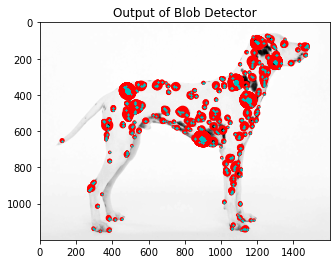

In [12]:
from matplotlib.patches import Circle

fig, ax = plt.subplots(1)
ax.imshow(im,cmap='gray')
plt.title('Output of Blob Detector')
#
# Look at the top <numCircles> entries in vals
for n in np.arange(x.size):
    ax.plot( x[n],y[n], color='c', marker='+', markersize=2 )
    hnd = Circle([x[n],y[n]],r[n],fill=False,color='r',linewidth=2.5)
    ax.add_patch(hnd)
plt.savefig(r'C:\Users\Hedieh\Documents\SMU\computer vision\Midterm\Blobdetection_sigma2_15levels_threshold0.35.png')
plt.show()


In [13]:
szNbrHood=26
NMS_THRESH=0.75 * np.max(scaleSpace)
LCLMX_scaleSpace = np.zeros([nR, nC, num_levels])
for n in range(num_levels):
    strElm = cv.getStructuringElement(cv.MORPH_RECT, (2 * int(szNbrHood) + 1, 2 * int(szNbrHood) + 1))
    LCLMX_scaleSpace[:,:,n] = cv.dilate(scaleSpace[:,:,n], strElm)
    #non_maximum_suppressed = np.where(result[:,:,n] == LCLMX_scaleSpace[:,:,n], 0)
    # Replace each pixel with maximum over neighboring scales
    prev_scale = np.maximum(n-1,0)
    next_scale = np.minimum(n+1,num_levels-1)
    LCLMX_scaleSpace[:,:,n] = np.amax(LCLMX_scaleSpace[:,:,prev_scale:next_scale],axis=2)
    mask = ((scaleSpace >= LCLMX_scaleSpace) & (scaleSpace >= NMS_THRESH))
    NMS_scaleSpace = np.zeros(scaleSpace.shape) 
    NMS_scaleSpace[mask] = scaleSpace[mask]

[y,x,d] = np.nonzero(NMS_scaleSpace)
r = np.power(2,0.5) * sigma_n[d]   

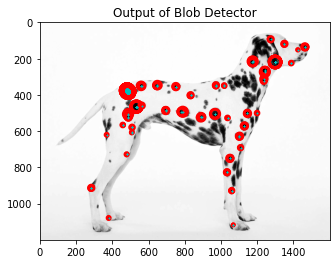

In [14]:
from matplotlib.patches import Circle

fig, ax = plt.subplots(1)
ax.imshow(im,cmap='gray')
plt.title('Output of Blob Detector')
#
# Look at the top <numCircles> entries in vals
for n in np.arange(x.size):
    ax.plot( x[n],y[n], color='c', marker='+', markersize=2 )
    hnd = Circle([x[n],y[n]],r[n],fill=False,color='r',linewidth=2.5)
    ax.add_patch(hnd)
plt.savefig(r'C:\Users\Hedieh\Documents\SMU\computer vision\Midterm\Blobdetection_sigma2_15levels_threshold0.75.png')
plt.show()
